In [1]:
#print("Hello, World!")
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

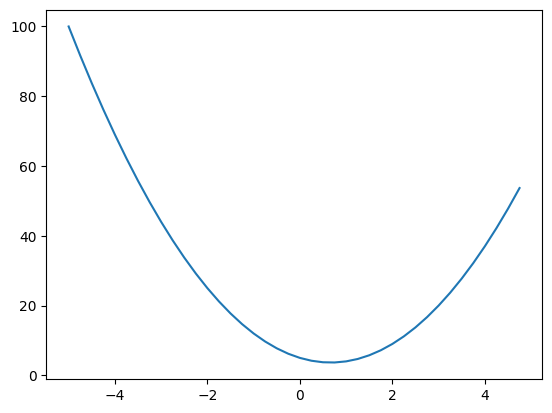

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

2.999378523327323e-06

In [6]:
h = 0.0001
a = 2.0
b = -3.0 
c = 10.0
d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [67]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [37]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [38]:
d._op

'+'

In [39]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in graph, create rectangular record node for it
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        #connect this node to it
        dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot
    

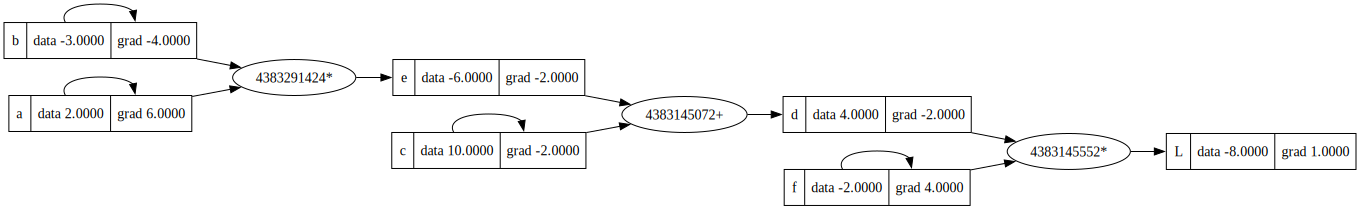

In [61]:
draw_dot(L)

In [ ]:
#L = d * f 
#dL/dd =? f
#(f(x+h) -f(x))/h
#((d+h)*f - d*f)/h
#(d*f + h*f - d*f)/h
#(h*f)/h
#f


In [52]:
c.grad = -2.0
e.grad = -2.0

In [ ]:
#if you understand the gradient for this node, you understand all of backpropagation and all 
#training of neural nets
#dL/dc #derivative of L with respect to C
#dd/dc ? 1.0
#dd/de = 1.0
#local derivative
#d = c + e
#(f(x+h) - f(x)) /h
#((c + h + e) - (c +e))/h
#(c + h + e - c - e)/h
#h/h
#1.0
# we know how l impacts d, we know how c and e impact d
# CHAIN RULE - product of 2 rates of change,  if a car travels 2x bicycle, 
#bicycle 4x as man, car = 2 * 4 = 8x a man
# + node routes the gradient, like funnel to children nodes of it
#want: 
#dL/dc = (dL/dd) * (dd/dc)

#know: 
#dl/dd
#dd/dc

In [60]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0


In [64]:
#dL / de = -2.0
#e = a * b
#de/da = ? 
#dL / da = (dL /de) * (de/da)
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 + f.grad

e = a * b
d = e + c
L = d * f
print(L.data)

7.472375999999999


In [63]:
#compute derivative of node with respect to L
# discover how weights are impacting Loss function
def lol():
    h = 0.001
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    b.data +=h
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h) #derivative of L with respect to A
    
lol()
#backpropagation is just a recursive application of the chain rule backwards through the graph

-3.9999999999995595


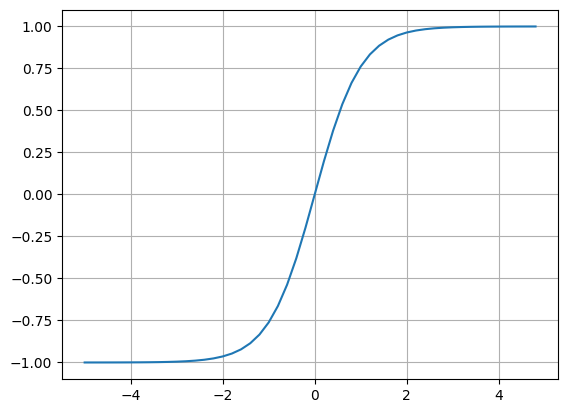

In [65]:
#backpropagate through a neuron (neural network, multilayer perceptron)
#tanh is the squashing/activation function
#activation fn applied to dot product of weights and inputs
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

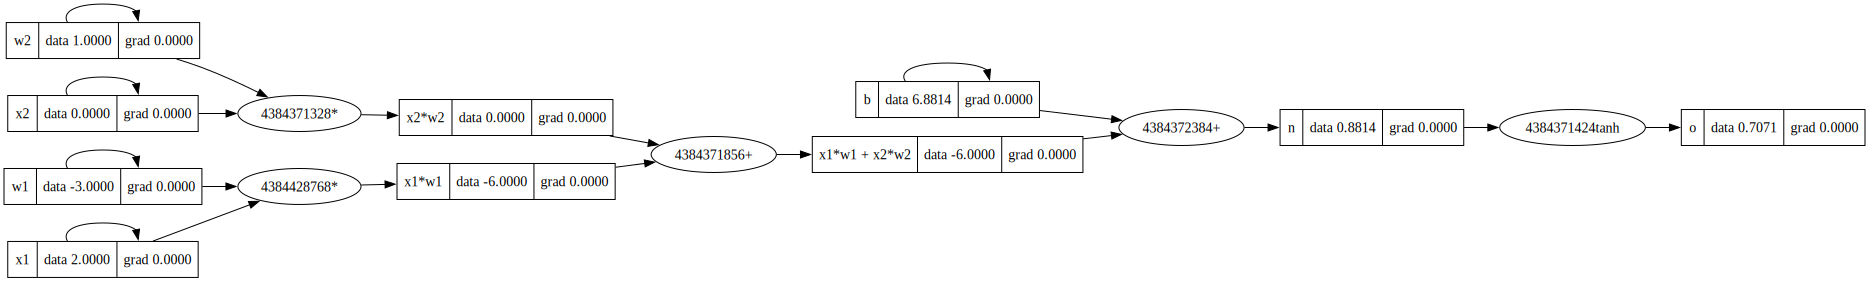

In [72]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights w1, w2 (synaptic strength)
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
#bias b
b = Value(6.8813735870195432, label = 'b')
#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' #hyperbolic function tanhx = sinhx/coshx (exponentiation)
draw_dot(o)

In [ ]:
#derivative of o with respect to all of the inputs
#weights change, so we care the most about those